# Pyargum Tutorial -- Sprinkler

[Sprinkler PyArgum Tutorial](https://pyagrum.readthedocs.io/en/latest/notebooks/01-Tutorial.html#Creating-your-first-Bayesian-network-with-pyAgrum)



In [1]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.BayesNet('WaterSprinkler')
c=bn.add(gum.LabelizedVariable('c','cloudy ?',2))
s, r, w = [ bn.add(name, 2) for name in "srw" ] #bn.add(name, 2) === bn.add(gum.LabelizedVariable(name, name, 2))

In [3]:
bn

(pyAgrum.BayesNet<double>@0x56021d324730) BN{nodes: 4, arcs: 0, domainSize: 16, dim: 8}

In [4]:
bn.addArc(c,s)

In [5]:
bn

(pyAgrum.BayesNet<double>@0x56021d324730) BN{nodes: 4, arcs: 1, domainSize: 16, dim: 10}

In [6]:
for link in [(c,r),(s,w),(r,w)]:
    bn.addArc(*link)
print(bn)

BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}


In [7]:
bn

(pyAgrum.BayesNet<double>@0x56021d324730) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}

In [8]:
# Create Probability Tables
bn.cpt(c).fillWith([0.4,0.6]) # remember : c=  0

(pyAgrum.Potential<double>@0x56021d076cf0) 
  c                |
0        |1        |
---------|---------|
 0.4000  | 0.6000  |

In [9]:
bn.cpt("c").fillWith([0.5,0.5])

(pyAgrum.Potential<double>@0x56021d076cf0) 
  c                |
0        |1        |
---------|---------|
 0.5000  | 0.5000  |

In [10]:
# CPT is conditional Probability Tables
bn.cpt("s").names

('s', 'c')

In [11]:
# We assign P(S|C)
bn.cpt("s")[:]=[ [0.5,0.5],[0.9,0.1]]

In [12]:
# Shows how to use a dictionary
bn.cpt("w")[{'r': 0, 's': 0}] = [1, 0]
bn.cpt("w")[{'r': 0, 's': 1}] = [0.1, 0.9]
bn.cpt("w")[{'r': 1, 's': 0}] = [0.1, 0.9]
bn.cpt("w")[{'r': 1, 's': 1}] = [0.01, 0.99]
bn.cpt("w")

(pyAgrum.Potential<double>@0x56021d24a8e0) 
             ||  w                |
s     |r     ||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 0.1000  | 0.9000  |
0     |1     || 0.1000  | 0.9000  |
1     |1     || 0.0100  | 0.9900  |

In [13]:
bn.cpt("r")[{'c':0}]=[0.8,0.2]
bn.cpt("r")[{'c':1}]=[0.2,0.8]

## Time to do Inference with Bayesian networks

### Exact inference, particularly :

**gum.LazyPropagation**: an exact inference method that transforms the Bayesian network into a hypergraph called a join tree or a junction tree. This tree is constructed in order to optimize inference computations.

In [14]:
ie=gum.LazyPropagation(bn)

In [15]:
ie

G <!-- s --> s s <!-- w --> w w <!-- s->w --> s->w <!-- r --> r r <!-- r->w --> r->w <!-- c --> c c <!-- c->s --> c->s <!-- c->r --> c->r Lazy Propagation on this BN,target(s) allEvidence and targets


In [16]:
ie.makeInference()
print (ie.posterior("w"))


  w                |
0        |1        |
---------|---------|
 0.3529  | 0.6471  |



In [17]:
a = ie.posterior("w")

In [18]:
a

(pyAgrum.Potential<double>@0x56021c8cf0e0) 
  w                |
0        |1        |
---------|---------|
 0.3529  | 0.6471  |

In [19]:
ie.setEvidence({'s':0, 'c': 0})
ie.makeInference()
ie.posterior("w")

(pyAgrum.Potential<double>@0x56021c2a0b00) 
  w                |
0        |1        |
---------|---------|
 0.8200  | 0.1800  |

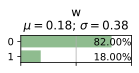

In [20]:
gnb.showProba(ie.posterior("w"))

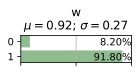

In [21]:
gnb.showPosterior(bn,{'s':1,'c':0},'w')

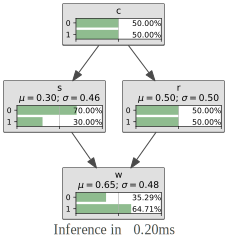

In [22]:
gnb.showInference(bn,evs={})

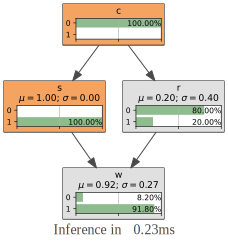

In [23]:
gnb.showInference(bn,evs={'s':1,'c':0})

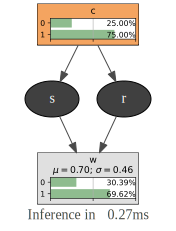

In [24]:
gnb.showInference(bn,evs={'c':[0.3,0.9]},targets={'c','w'})
